<a href="https://colab.research.google.com/github/rameenhamad/API_Handling/blob/main/1_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

loading dataset

In [23]:
#boston housing data set was not loading due to some investigation error
dt = datasets.fetch_california_housing()

making dataframe of dataset

In [24]:
df = pd.DataFrame(data= dt.data, columns=dt.feature_names)
target_column = dt.target_names[0]
df[target_column] = dt.target
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
df.isnull().sum()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



data distribution in dataset

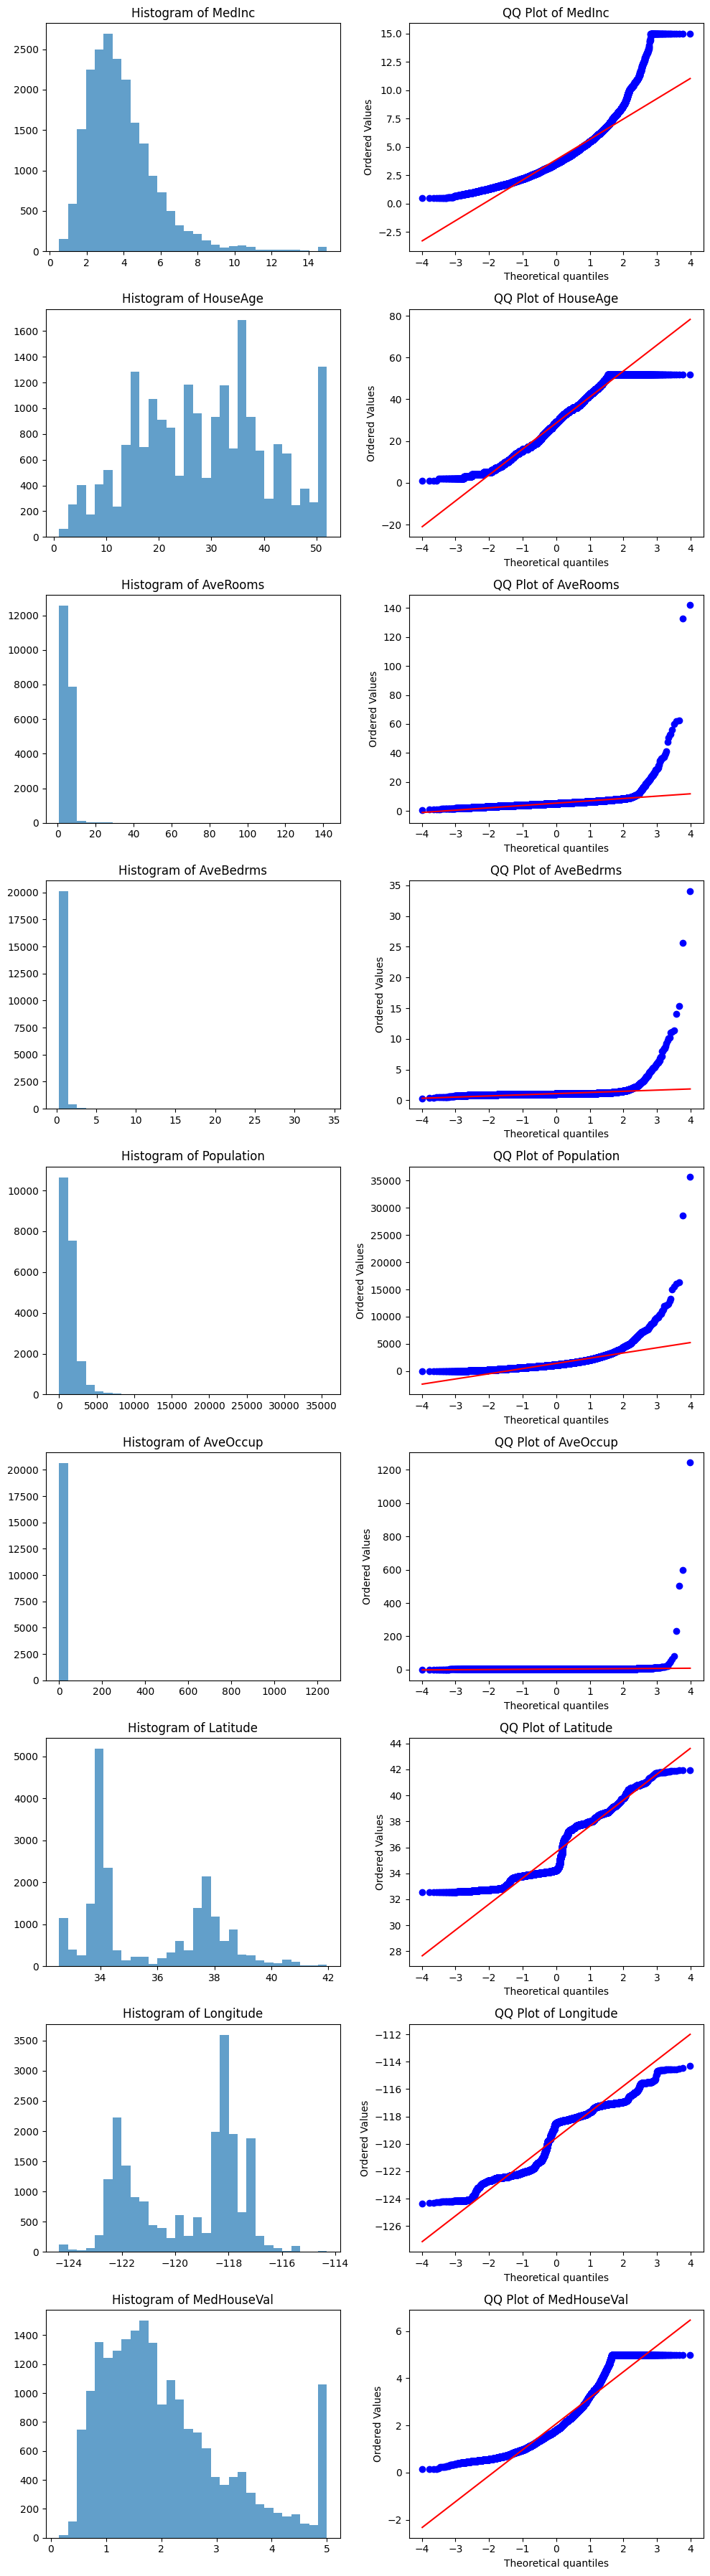

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as st

n_features = df.shape[1]
fig, axes = plt.subplots(n_features, 2, figsize=(10, 4*n_features))

for i, col in enumerate(df.columns):
    # Histogram
    axes[i, 0].hist(df[col], bins=30, alpha=0.7)
    axes[i, 0].set_title(f"Histogram of {col}")

    # QQ plot
    st.probplot(df[col].values, plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ Plot of {col}")

plt.tight_layout()
plt.show()

Feature transformation

In [27]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X_trans = pt.fit_transform(dt.data)

In [28]:
X = pd.DataFrame(X_trans, columns=dt.feature_names)
Y = df['MedHouseVal']

train_test_spliting data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=37)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

input features after transform

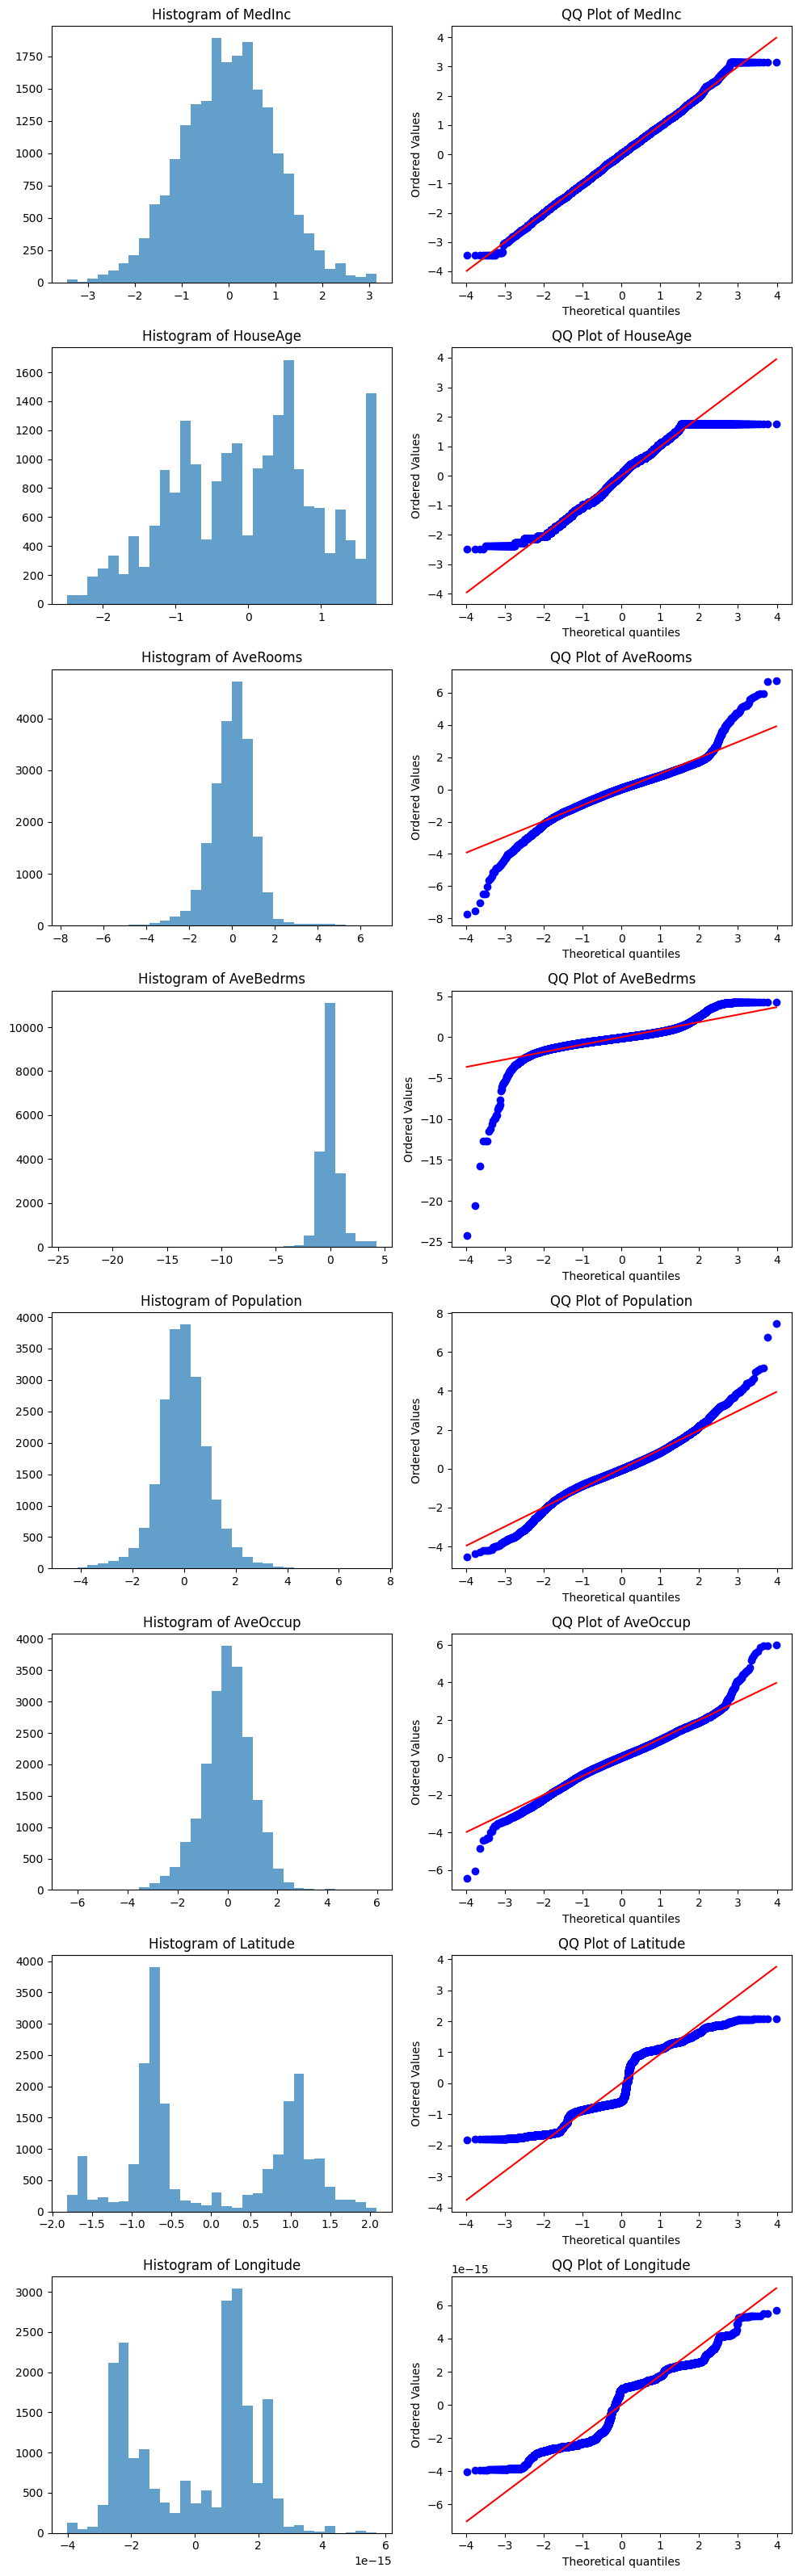

In [30]:
n_features = X.shape[1]
fig, axes = plt.subplots(n_features, 2, figsize=(10, 4*n_features))

for i, col in enumerate(X.columns):
    # Histogram
    axes[i, 0].hist(X[col], bins=30, alpha=0.7)
    axes[i, 0].set_title(f"Histogram of {col}")

    # QQ plot
    st.probplot(X[col].values, plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ Plot of {col}")

plt.tight_layout()
plt.show()

sekewed y

log function transformation for Y

In [31]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(func=np.log1p)

Y_train_trans = ft.fit_transform(Y_train)
Y_test_trans = ft.transform(Y_test)


Scaling

In [32]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

y after transform

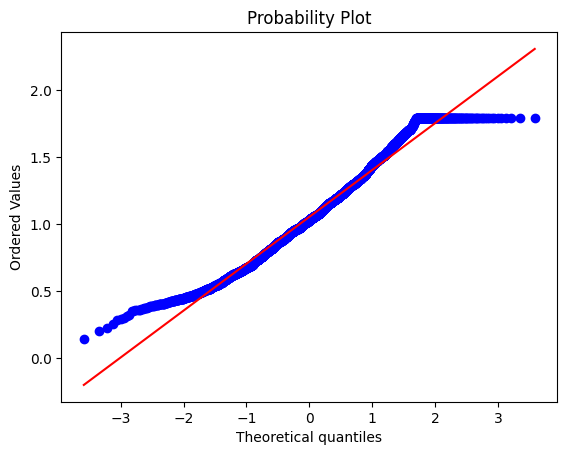

In [34]:
import scipy.stats as st

st.probplot(Y_test_trans, plot = plt)

plt.show()

Model training

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, Y_train_trans)

Y_predict = model.predict(X_test_scaled)
#getting inverse of Y to actual value from log
Y_pred = np.expm1(Y_predict)

Root Mean Squared Error

In [36]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(Y_test, Y_pred)
rmse_log = root_mean_squared_error(Y_test_trans, Y_predict)
print(f"Root Mean Squared Error (RMSE) for Raw values(Original Y): {rmse}")
print(f"Root Mean Squared Error (RMSE) Log Transformed Y : {rmse_log}")

Root Mean Squared Error (RMSE) for Raw values(Original Y): 0.6483159828865405
Root Mean Squared Error (RMSE) Log Transformed Y : 0.1999048797107929


Plot predictions vs actual

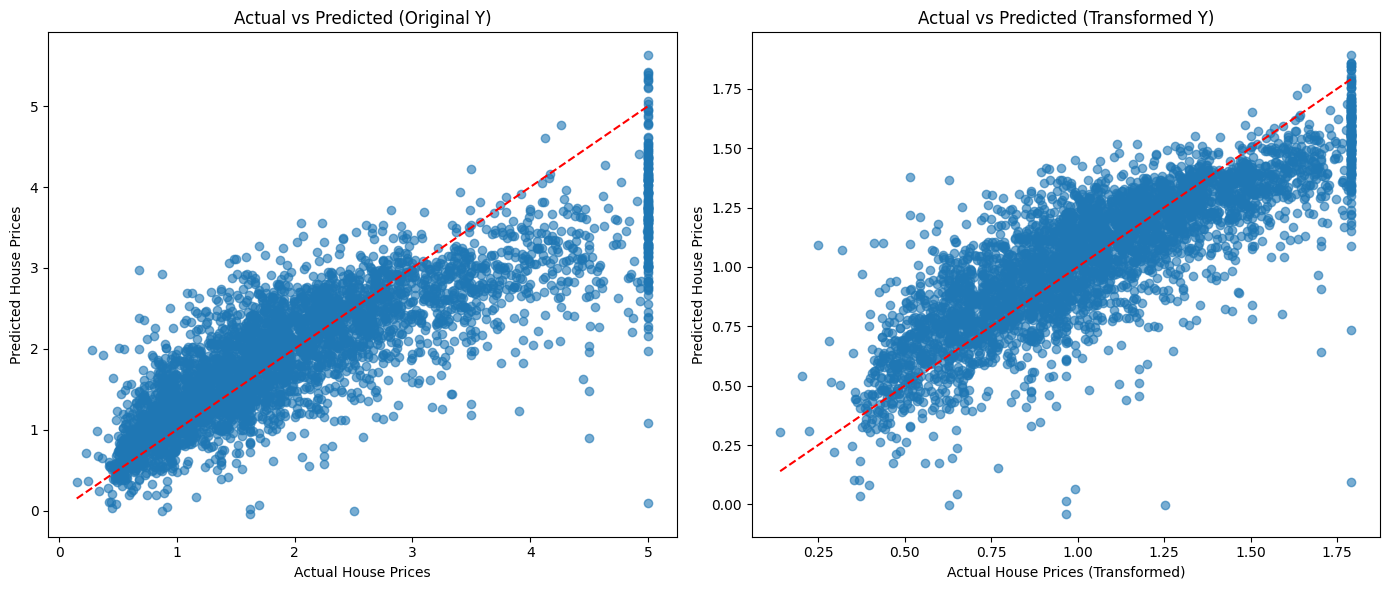

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(Y_test, Y_pred, alpha=0.6)
axes[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
axes[0].set_xlabel("Actual House Prices")
axes[0].set_ylabel("Predicted House Prices")
axes[0].set_title("Actual vs Predicted (Original Y)")

axes[1].scatter(Y_test_trans, Y_predict, alpha=0.6)
axes[1].plot([Y_test_trans.min(), Y_test_trans.max()], [Y_test_trans.min(), Y_test_trans.max()], 'r--')
axes[1].set_xlabel("Actual House Prices (Transformed)")
axes[1].set_ylabel("Predicted House Prices")
axes[1].set_title("Actual vs Predicted (Transformed Y)")

plt.tight_layout()
plt.show()